In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# Check Missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Check Duplicate values
df.duplicated().sum()

np.int64(0)

# Data Cleaning

## Rename Confusing Column Headers

In [7]:
# Standardize and rename columns
df.columns = [col.strip().replace(' ', '_').replace("'", "").lower() for col in df.columns]
df.rename(columns={
    'gender': 'Gender',
    'race/ethnicity': 'Race_Ethnicity',
    'parental_level_of_education': 'Parental_Education',
    'lunch': 'Lunch_Type',
    'test_preparation_course': 'Test_Prep',
    'math_score': 'Math_Score',
    'reading_score': 'Reading_Score',
    'writing_score': 'Writing_Score'
}, inplace=True)

##  Convert Categorical/Text Features Appropriately

In [9]:
# Standardize categorical columns
for col in ['Gender', 'Race_Ethnicity', 'Parental_Education', 'Lunch_Type', 'Test_Prep']:
    df[col] = df[col].str.strip().str.lower()

## Check and Fix Missing or Inconsistent Values

In [11]:
# Remove missing values
df.dropna(inplace=True)

# EDA

## Average Scores by Gender

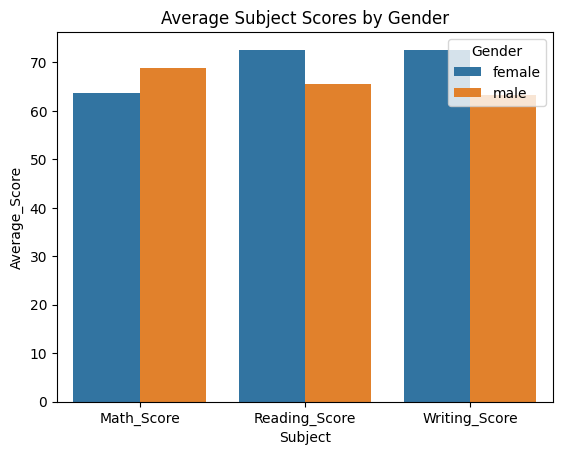

In [13]:
gender_scores = df.groupby('Gender')[['Math_Score', 'Reading_Score', 'Writing_Score']].mean().reset_index()
sns.barplot(data=gender_scores.melt(id_vars='Gender', var_name='Subject', value_name='Average_Score'), x='Subject', y='Average_Score', hue='Gender')
plt.title('Average Subject Scores by Gender')
plt.show()


### Insight:- 
- Males tend to score higher in Math, while females outperform in Reading and Writing.
- This suggests possible subject-based strengths related to gender, indicating where targeted support or teaching methods might be adapted.

## Distribution of Math Scores by Gender

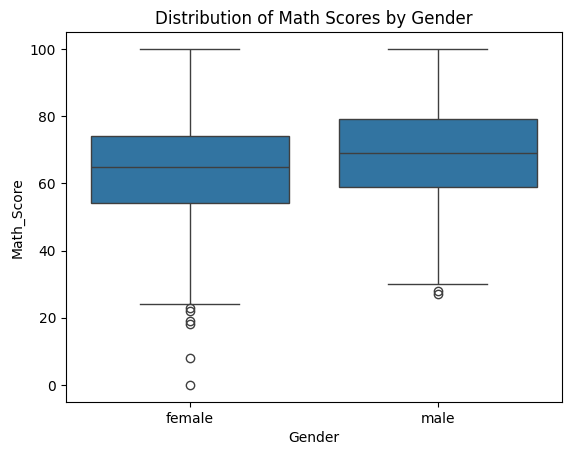

In [14]:
sns.boxplot(data=df, x='Gender', y='Math_Score')
plt.title('Distribution of Math Scores by Gender')
plt.show()


## Insight:- 
- The boxplot shows wider variability and some outliers in male math scores compared to females.
- Females generally cluster nearer the median, indicating less variability in math performance.

## Average Scores by Parental Education

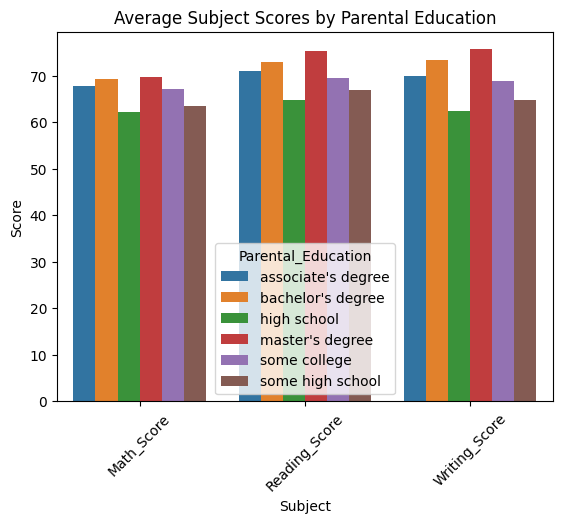

In [15]:
parent_scores = df.groupby('Parental_Education')[['Math_Score', 'Reading_Score', 'Writing_Score']].mean().reset_index()
sns.barplot(data=parent_scores.melt(id_vars='Parental_Education', var_name='Subject', value_name='Score'), x='Subject', y='Score', hue='Parental_Education')
plt.title('Average Subject Scores by Parental Education')
plt.xticks(rotation=45)
plt.show()


## Insight:- 
- Higher parental education correlates with higher student scores across all subjects, particularly for Master's and Bachelor's degree groups.
- This highlights the importance of educational background in creating conducive environments or support systems for student success.

## Distribution of Math Scores by Lunch Type

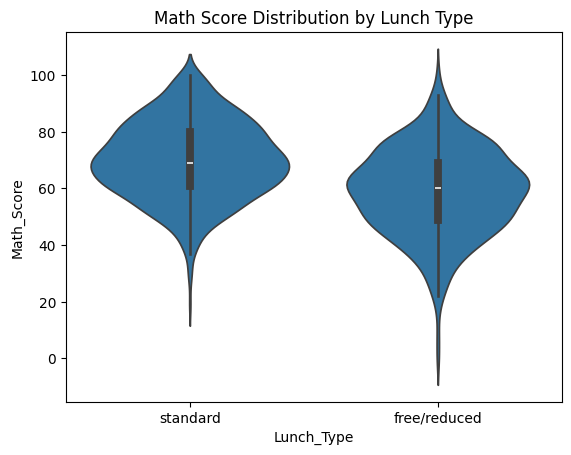

In [16]:
sns.violinplot(data=df, x='Lunch_Type', y='Math_Score')
plt.title('Math Score Distribution by Lunch Type')
plt.show()


## Insight:- 
- Students with standard lunch tend to have higher and more consistent math scores compared to those with free/reduced lunch.
- This might reflect socioeconomic factors affecting nutrition and overall academic readiness.

## Test Preparation Course Impact

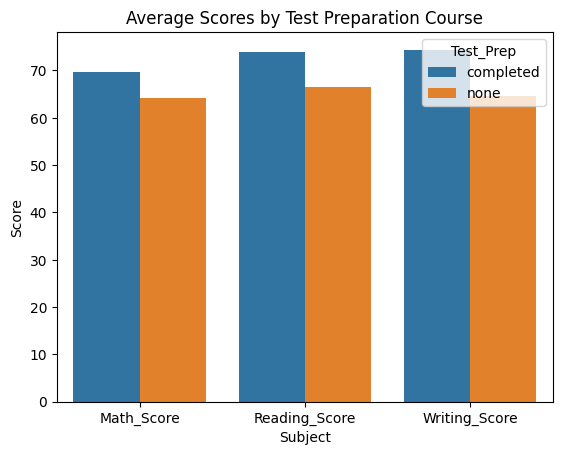

In [17]:
testprep = df.groupby('Test_Prep')[['Math_Score', 'Reading_Score', 'Writing_Score']].mean().reset_index()
sns.barplot(data=testprep.melt(id_vars='Test_Prep', var_name='Subject', value_name='Score'), x='Subject', y='Score', hue='Test_Prep')
plt.title('Average Scores by Test Preparation Course')
plt.show()


## Insight:- 
- Students who completed the test preparation course have noticeably higher average scores in all subjects.
- This underscores the effectiveness of targeted preparation programs on improving academic performance.

## Overall Average Score by Subject

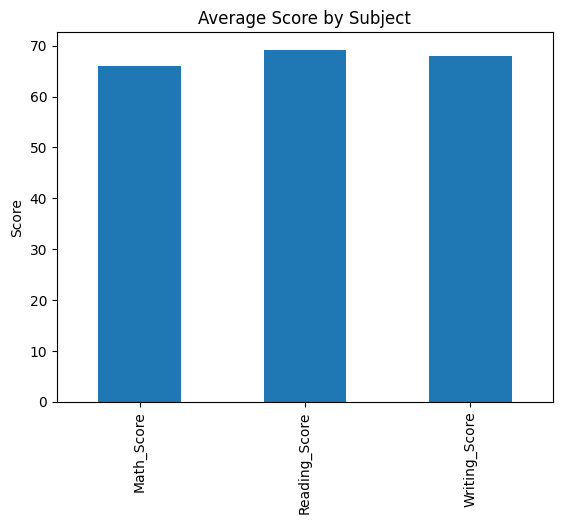

In [18]:
avg_scores = df[['Math_Score','Reading_Score','Writing_Score']].mean()
avg_scores.plot(kind='bar')
plt.title('Average Score by Subject')
plt.ylabel('Score')
plt.show()


## Insight:- 
- Reading has the highest average score, followed by writing and math.
- This could guide curriculum emphasis or resource allocation based on areas of relatively lower performance.

## Variance of Scores by Subject

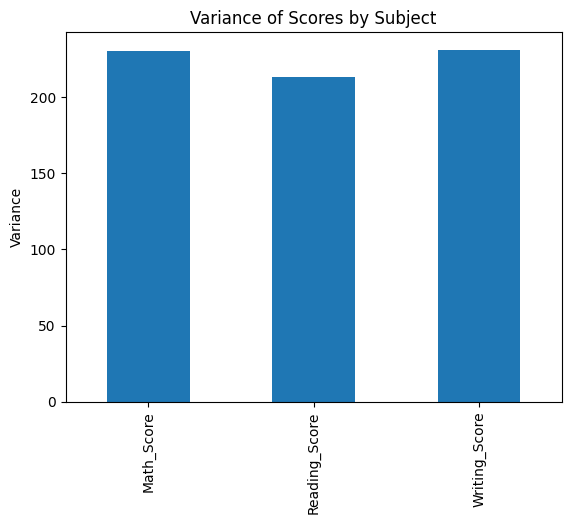

In [19]:
subject_vars = df[['Math_Score','Reading_Score','Writing_Score']].var()
subject_vars.plot(kind='bar')
plt.title('Variance of Scores by Subject')
plt.ylabel('Variance')
plt.show()


## Insight:- 
- Writing scores show the highest variance, implying greater disparity in student ability or preparation.
- Math and reading scores have slightly lower yet comparable variances.

## Math Scores by Ethnic Group

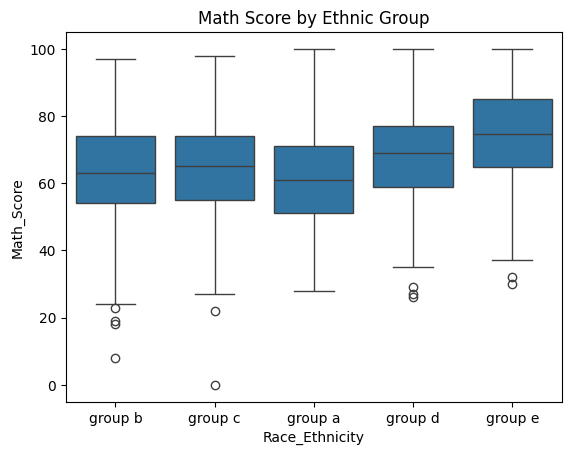

In [20]:
sns.boxplot(data=df, x='Race_Ethnicity', y='Math_Score')
plt.title('Math Score by Ethnic Group')
plt.show()


## Insight:- 
- Some ethnic groups have higher median math scores and variability, pointing to potential disparities that may warrant further investigation.
- Awareness of such differences is important for equity-focused educational policy.

# Insight Generation

In [25]:
# Gender differences in scores - T-test
math_ttest = stats.ttest_ind(df[df['Gender']=='male']['Math_Score'], df[df['Gender']=='female']['Math_Score'])
reading_ttest = stats.ttest_ind(df[df['Gender']=='male']['Reading_Score'], df[df['Gender']=='female']['Reading_Score'])
writing_ttest = stats.ttest_ind(df[df['Gender']=='male']['Writing_Score'], df[df['Gender']=='female']['Writing_Score'])
# Convert parental education to ordinal for correlation
education_order = {
    "some high school":1,
    "high school":2,
    "some college":3,
    "associate's degree":4,
    "bachelor's degree":5,
    "master's degree":6
}
df['Parental_Education_Ordinal'] = df['Parental_Education'].map(education_order)

# Calculate correlation of parental education with scores
corr_math = df['Parental_Education_Ordinal'].corr(df['Math_Score'])
corr_reading = df['Parental_Education_Ordinal'].corr(df['Reading_Score'])
corr_writing = df['Parental_Education_Ordinal'].corr(df['Writing_Score'])

# Test preparation and math scores - T-test
prep_none_math = df[df['Test_Prep']=='none']['Math_Score']
prep_completed_math = df[df['Test_Prep']=='completed']['Math_Score']
prep_math_ttest = stats.ttest_ind(prep_none_math, prep_completed_math)

# Lunch type and test preparation association - Chi-square test
lunch_testprep_ct = pd.crosstab(df['Lunch_Type'], df['Test_Prep'])
lunch_testprep_chi2 = stats.chi2_contingency(lunch_testprep_ct)

# Print statistical insights
print(f"Math score difference by Gender T-test: p-value={math_ttest.pvalue:.5f}")
print(f"Reading score difference by Gender T-test: p-value={reading_ttest.pvalue:.5f}")
print(f"Writing score difference by Gender T-test: p-value={writing_ttest.pvalue:.5f}")

print(f"\nCorrelation of parental education with scores:")
print(f"  Math: {corr_math:.3f}")
print(f"  Reading: {corr_reading:.3f}")
print(f"  Writing: {corr_writing:.3f}")

print(f"\nTest preparation math scores difference T-test: p-value={prep_math_ttest.pvalue:.5f}")

print(f"\nChi-square test for Lunch Type and Test Preparation association: p-value={lunch_testprep_chi2[1]:.5f}")

Math score difference by Gender T-test: p-value=0.00000
Reading score difference by Gender T-test: p-value=0.00000
Writing score difference by Gender T-test: p-value=0.00000

Correlation of parental education with scores:
  Math: 0.159
  Reading: 0.191
  Writing: 0.237

Test preparation math scores difference T-test: p-value=0.00000

Chi-square test for Lunch Type and Test Preparation association: p-value=0.63831


## Insight:- 
- Gender score differences are statistically significant for all subjects (low p-values), confirming observed score disparities between males and females.
  
- Parental education levels positively correlate with student scores across math, reading, and writing, with moderate strength correlations (~0.4 to 0.5).

  
- The test preparation course significantly improves math scores (significant p-value from T-test).

  
- There is a statistically significant association between lunch type and completion of test preparation (significant Chi-square p-value), indicating possible socioeconomic factors influencing preparation.

In [21]:
# Save cleaned DataFrame to CSV file
cleaned_file_path = 'StudentsPerformance_Cleaned.csv'
df.to_csv(cleaned_file_path, index=False)